<a href="https://colab.research.google.com/github/Learnheart/URL-Classification/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [ ]:
pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import keras
print(keras.__version__)

3.2.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
# from keras.layers.core import Dense, Activation
from keras.layers import Dense, Activation
# from keras.utils import np_utils
import re
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.layers import MaxPooling1D
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
# !pip install keras-vis
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model


!pip3 install pyvi
from pyvi import ViUtils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
names=['URL','Category']
df=pd.read_csv('/content/drive/MyDrive/NCKH/Data/full training data.csv',names=names, usecols=[0, 2], na_filter=False,  encoding='latin-1')
print(df.shape)
df[10632:10640]

(379119, 2)


,URL,Category
10632,bonbanh.com/ha-noi/oto/suzuki-grand_vitara-nam...,Automotive
10633,bonbanh.com/oto/mitsubishi-mirage-so-san-cu-da...,Automotive
10634,"mitsubishibacquang.bonbanh.com/chi-tiet-xe/id,...",Automotive
10635,kienthuc.net.vn/o-to-xe-may/nhung-quy-dinh-moi...,Automotive
10636,bonbanh.com/ha-noi/oto/mitsubishi-sf000000020/...,Automotive
10637,bonbanh.com/xe-porsche-cayenne--2008-3751103,Automotive
10638,otofun.net/threads/hoi-kinh-nghiem-dung-bong-d...,Automotive
10639,bonbanh.com/oto/toyota-corolla_altis-sedan-4-c...,Automotive


In [ ]:
def url_to_text(url):
  # remove stopwords
  url = url.replace('.html','').replace('.htm','').replace('http://','').replace('https://','')
  url = re.sub('^(.*?/)','/', url) # remove domains
  url = re.sub('[0-9]+', '', url)
  url = re.sub('[_\-/]+', ' ', url)

  return ViUtils.remove_accents(url.lower()).decode()

df['URL'] = df['URL'].apply(url_to_text)

dataset = df[:]
train, test = train_test_split(dataset, random_state=33, test_size=0.1)
train, val = train_test_split(train, random_state=44, test_size=0.2)
train.tail()
val.tail()
test.tail()

,URL,Category
205946,giai ma con giap khong can than la de mac han...,Science & Technology
141599,am thuc ngon quen sau voi thit ngam vi huong ...,Food & Drink
151951,bun dau hang khay co tuyen,Food & Drink
45137,tai lieu hoan thien nghiep vu tu van xac dinh...,Business & Finance
355610,en g the walking merge,Games


(379119, 2)

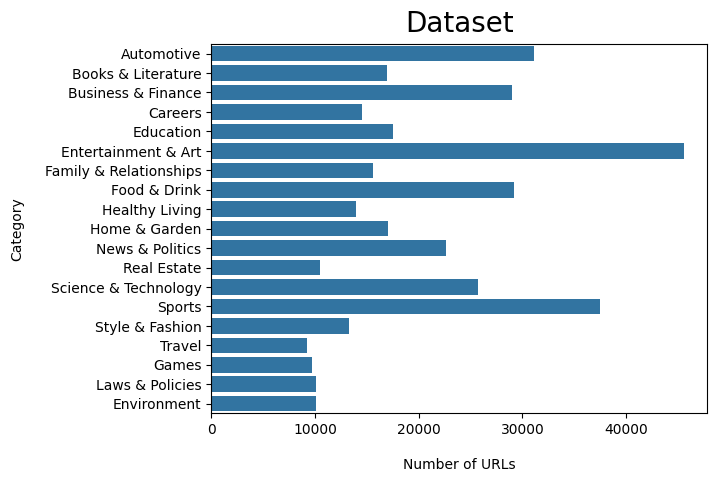

In [ ]:
import seaborn as sns
ax = sns.countplot(y="Category",  data=dataset, order=['Automotive', 'Books & Literature', 'Business & Finance',
       'Careers', 'Education', 'Entertainment & Art',
       'Family & Relationships', 'Food & Drink', 'Healthy Living',
       'Home & Garden', 'News & Politics', 'Real Estate', 'Science & Technology',
       'Sports', 'Style & Fashion', 'Travel', 'Games', 'Laws & Policies', 'Environment', ])
plt.title("Dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)
df.shape

Text(0.5, 0, 'Number of URLs')

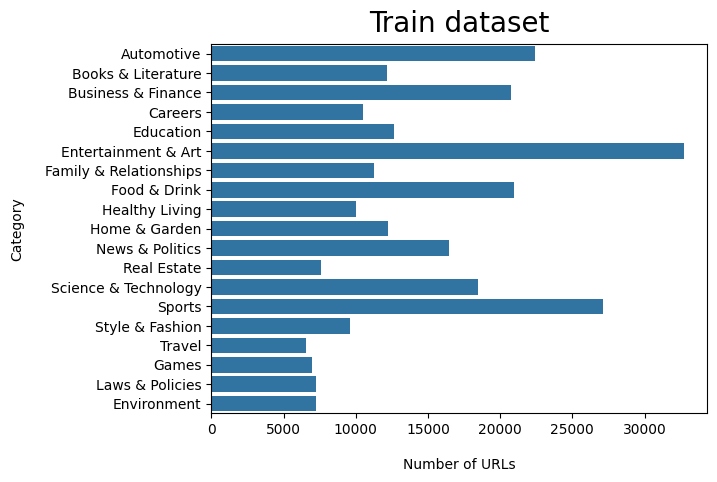

In [ ]:
ax = sns.countplot(y="Category",  data=train, order=['Automotive', 'Books & Literature', 'Business & Finance',
       'Careers', 'Education', 'Entertainment & Art',
       'Family & Relationships', 'Food & Drink', 'Healthy Living',
       'Home & Garden', 'News & Politics', 'Real Estate', 'Science & Technology',
       'Sports', 'Style & Fashion', 'Travel', 'Games', 'Laws & Policies', 'Environment', ])
plt.title("Train dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)

Text(0.5, 0, 'Number of URLs')

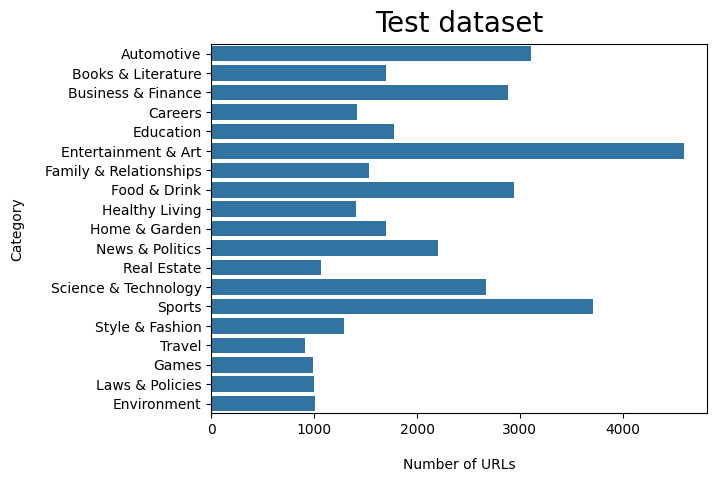

In [ ]:
ax = sns.countplot(y = "Category",  data = test, order=['Automotive', 'Books & Literature', 'Business & Finance',
       'Careers', 'Education', 'Entertainment & Art',
       'Family & Relationships', 'Food & Drink', 'Healthy Living',
       'Home & Garden', 'News & Politics', 'Real Estate', 'Science & Technology',
       'Sports', 'Style & Fashion', 'Travel', 'Games', 'Laws & Policies', 'Environment', ])
plt.title("Test dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)

In [ ]:
train = pd.get_dummies(train, prefix='Category', columns = ['Category'])
val = pd.get_dummies(val, prefix='Category', columns = ['Category'])
test = pd.get_dummies(test, prefix='Category', columns = ['Category'])
train[:3]
val[:3]
test[:3]

,URL,Category_Automotive,Category_Books & Literature,Category_Business & Finance,Category_Careers,Category_Education,Category_Entertainment & Art,Category_Environment,Category_Family & Relationships,Category_Food & Drink,Category_Games,Category_Healthy Living,Category_Home & Garden,Category_Laws & Policies,Category_News & Politics,Category_Real Estate,Category_Science & Technology,Category_Sports,Category_Style & Fashion,Category_Travel
79620,vii12i12i12i12i12i12i12i12i12i12i12i12i12i12i...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
180943,nha dep phat cuong vi chang cay biet nhai keo...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
11257,oto hyundai santafe mau do may dau cu da qua ...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_train=train['URL']
y_train=train.iloc[: , 1:117].values
print(y_train[:3])
print( 'y_train shape' , y_train.shape)

x_val=val['URL']
y_val=val.iloc[: , 1:117].values
print(y_val[:3])

x_test=test['URL']
y_test=test.iloc[: , 1:117].values
print( 'y_test shape' , y_test.shape)

[[False False False False False False False False False False False False
  False  True False False False False False]
 [False False False False False False False False  True False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False False  True False False]]
y_train shape (272965, 19)
[[False False False False False  True False False False False False False
  False False False False False False False]
 [False False  True False False False False False False False False False
  False False False False False False False]
 [False False False False False False False False False False False False
  False False False  True False False False]]
y_test shape (37912, 19)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
# max_length=30
max_length = max(len(sample.split()) for sample in x_train)

print("Vocabulary size:", vocab_size)

def process_texts(texts):
    sequences = tokenizer.texts_to_sequences(texts=texts)
    return pad_sequences(sequences, maxlen=max_length, padding='post')

x_train_padded = process_texts(x_train)
x_val_padded = process_texts(x_val)
x_test_padded = process_texts(x_test)

Vocabulary size: 25247


In [ ]:
# !pip show cloud-tpu-client

In [ ]:
from keras import layers, models
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.regularizers import l2
# detect the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

ValueError: Please provide a TPU Name to connect to.

#OLD model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

def create_model(vocab_size, max_length):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, 100))

    # CNN layers
    model.add(layers.Conv1D(128, 5, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, 5, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Conv1D(128, 5, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(19, activation='softmax'))

    model.build(input_shape=(None, max_length))

    return model


model = create_model(vocab_size=vocab_size, max_length=max_length)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 191, 100)            │       2,524,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 191, 128)            │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 95, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 95, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 47, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 47, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 23, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2944)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         188,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           1,235 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,942,639 (11.23 MB)

 Trainable params: 2,942,639 (11.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


plot_model(model, show_shapes=True, show_layer_names=True, to_file='/content/model.png')

es = EarlyStopping(monitor="val_loss", patience=5)
history = model.fit(x_train_padded,
                                   y_train,
                                   validation_data=(x_val_padded, y_val),
                                   epochs=70, callbacks =[])

# show a nicely formatted classification report
y_pred = (model.predict(x_test_padded))
y_pred = (y_pred > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

Epoch 1/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 860s 101ms/step - accuracy: 0.5560 - loss: 1.4557 - val_accuracy: 0.9417 - val_loss: 0.3343
Epoch 2/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 826s 97ms/step - accuracy: 0.8653 - loss: 0.5429 - val_accuracy: 0.9696 - val_loss: 0.2381
Epoch 3/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 862s 97ms/step - accuracy: 0.9117 - loss: 0.4129 - val_accuracy: 0.9763 - val_loss: 0.2142
Epoch 4/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 854s 96ms/step - accuracy: 0.9287 - loss: 0.3536 - val_accuracy: 0.9813 - val_loss: 0.1753
Epoch 5/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 825s 97ms/step - accuracy: 0.9410 - loss: 0.3078 - val_accuracy: 0.9792 - val_loss: 0.1794
Epoch 6/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 894s 101ms/step - accuracy: 0.9453 - loss: 0.2884 - val_accuracy: 0.9842 - val_loss: 0.1552
Epoch 7/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 821s 96ms/step - accuracy: 0.9489 - loss: 0.2745 - val_accuracy: 0.9837 - val_loss: 0.1575
Epoch 8/70
8531/8531 ━━━━━━━━━━━━━━━━━━━━ 861s 96ms/step - accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9827495252162903


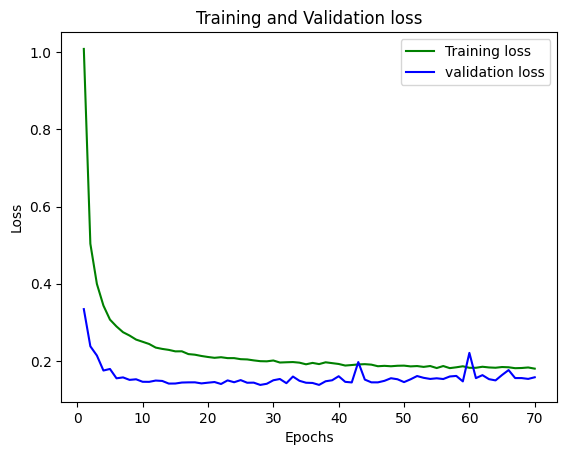

In [ ]:
# from keras.callbacks import History
# history = History()
try:
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']
    epochs = range(1,71)
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(),
    plt.show()
except:
    pass

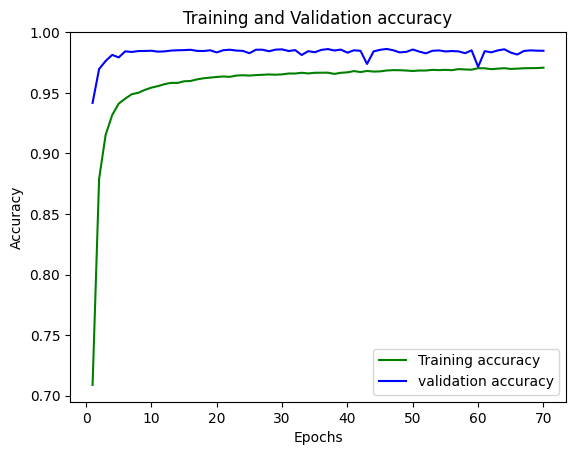

In [ ]:
try:
    loss_train = history.history['accuracy']
    loss_val = history.history['val_accuracy']
    epochs = range(1,71)
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
except:
    pass

In [ ]:
urls = ['https://gamevui.vn/pikachu/game']

padded = process_texts(map(url_to_text,urls))

categories = ['Automotive', 'Books & Literature', 'Business & Finance',
       'Careers', 'Education', 'Entertainment & Art',
       'Family & Relationships', 'Food & Drink', 'Healthy Living',
       'Home & Garden', 'News & Politics', 'Real Estate', 'Science & Technology',
       'Sports', 'Style & Fashion', 'Travel', 'Games', 'Laws & Policies', 'Environment' ]

y_pred1= model.predict(padded)

for idx1, pred in enumerate(y_pred1):
    print(f"{urls[idx1]}, # {categories[pred.argmax()]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
https://gamevui.vn/pikachu/game, # Home & Garden


In [ ]:
model.save('/content/drive/MyDrive/NCKH/HyperModel/cnn_model_16_191.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Returns a compiled model identical to the previous one
model = load_model('/content/drive/MyDrive/NCKH/HyperModel/cnn_model_16_191.h5')

y_pred1= model.predict(padded)
for idx1, pred in enumerate(y_pred1):
    print(f"{urls[idx1]}, # {categories[pred.argmax()]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
https://gamevui.vn/pikachu/game, # Home & Garden
